In [1]:
import numpy as np
import laserhockey.hockey_env as h_env
import gymnasium as gym
from importlib import reload
import time
import torch
import DDPG
import TD3
import os
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(suppress=True)
reload(h_env)

C:\Users\lenna\anaconda3\envs\rl-proj\lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Overriding environment Hockey-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
C:\Users\lenna\anaconda3\envs\rl-proj\lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Overriding environment Hockey-One-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


<module 'laserhockey.hockey_env' from 'C:\\Users\\lenna\\Desktop\\RL\\Project\\RL-Hockey\\laserhockey\\hockey_env.py'>

In [3]:
def moving_average(data, win_size):
    data = np.asarray(data)
    averages = []
    for i in range(len(data)-win_size):
        averages.append(np.sum(data[i:i+win_size])/win_size)
    return averages

class Random_opponent():
    def __init__(self, keep_mode=True):
        self.keep_mode = keep_mode
    def act():
        if self.keep_mode:
            return np.random.uniform(-1,1,4)
        return np.random.uniform(-1,1,3)

In [4]:
def save_statistics():
    with open(f"./results/DDPG_hockey-eps{eps}-t{train_iter}-l{lr}-s{random_seed}-stat.pkl", 'wb') as f:
        pickle.dump({"rewards" : rewards, "lengths": lengths, "eps": eps, "train": train_iter,
                     "lr": lr, "update_every": opts.update_every, "losses": losses}, f)

In [5]:
### training ###
def train(agent, mode="weak", episodes=100, eps=0.2, iter_fit=32, test=False, render=False):
    save_as=f'./results/{type(agent).__name__}_hockey_{episodes}-eps{eps}-{mode}.pth'
    #stats
    if mode=="normal" or mode=="weak":
        env = h_env.HockeyEnv()
    if mode=="defense":
        env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_DEFENSE)
    if mode=="attack":
        env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)
        
    if mode=="normal":
        player2 = h_env.BasicOpponent(weak=False)
    elif mode=="weak":
        player2 = h_env.BasicOpponent()
    else:
        player2 = Random_opponent()
    player1 = agent
    obs_agent2 = env.obs_agent_two()
    if type(agent).__name__=="TD3Agent":
        train_losses = np.empty((0,4))
    else:
        train_losses = np.empty((0,2))
    rewards = []
    wins = 0
    losses = 0
    for i in range(episodes):
        if i%100==0:
            print("Episode: ", i)
        obs, info = env.reset()
        d = False
        ep_r = 0
        while not d:
            if render:
                env.render()
            a1 = player1.act(obs, eps=eps)
            a2 = player2.act(obs_agent2)
            obsnew, r, d, _, info = env.step(np.hstack([a1,a2]))
            if info['winner']==1:
                wins += 1
            elif info['winner']==-1:
                losses += 1
            player1.store_transition((obs, a1, r, obsnew, d))
            obs_agent2 = env.obs_agent_two()
            obs=obsnew
            ep_r +=r
        if not test and i>10:
            loss = player1.train(iter_fit)
            train_losses = np.concatenate((train_losses, np.asarray(loss)))
        rewards.append(ep_r)
    print(f'Wins: {wins}')
    print(f'Losses: {losses}')
    print(f'W/L: {wins/losses}')
    env.close()
    if not test:
        torch.save(player1.state(), save_as)
    return train_losses, rewards

In [6]:
eps=0.1
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_DEFENSE)
agent = TD3.TD3Agent(env.observation_space, env.action_space, discount=1, eps=eps)
print(type(agent).__name__)

TD3Agent


Episode:  0
Episode:  100
Episode:  200
Episode:  300
Episode:  400
Episode:  500
Episode:  600
Episode:  700
Episode:  800
Episode:  900
Episode:  1000
Episode:  1100
Episode:  1200
Episode:  1300
Episode:  1400
Episode:  1500
Episode:  1600
Episode:  1700
Episode:  1800
Episode:  1900
Episode:  2000
Episode:  2100
Episode:  2200
Episode:  2300
Episode:  2400
Episode:  2500
Episode:  2600
Episode:  2700
Episode:  2800
Episode:  2900
Episode:  3000
Episode:  3100
Episode:  3200
Episode:  3300
Episode:  3400
Episode:  3500
Episode:  3600
Episode:  3700
Episode:  3800
Episode:  3900
Episode:  4000
Episode:  4100
Episode:  4200
Episode:  4300
Episode:  4400
Episode:  4500
Episode:  4600
Episode:  4700
Episode:  4800
Episode:  4900
Episode:  5000
Episode:  5100
Episode:  5200
Episode:  5300
Episode:  5400
Episode:  5500
Episode:  5600
Episode:  5700
Episode:  5800
Episode:  5900
Episode:  6000
Episode:  6100
Episode:  6200
Episode:  6300
Episode:  6400
Episode:  6500
Episode:  6600
Episode

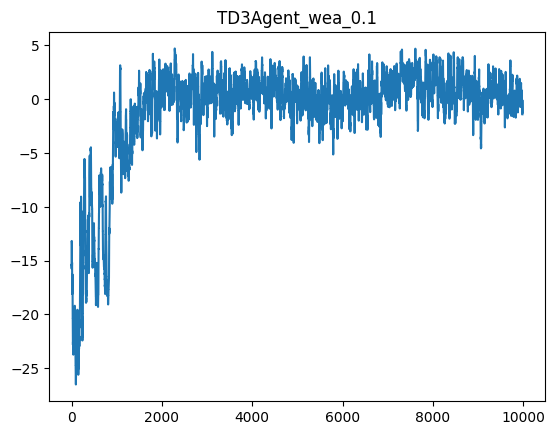

Episode:  0
Episode:  100
Episode:  200
Episode:  300
Episode:  400
Episode:  500
Episode:  600
Episode:  700
Episode:  800
Episode:  900
Episode:  1000
Episode:  1100
Episode:  1200
Episode:  1300
Episode:  1400
Episode:  1500
Episode:  1600
Episode:  1700
Episode:  1800
Episode:  1900
Episode:  2000
Episode:  2100
Episode:  2200
Episode:  2300
Episode:  2400
Episode:  2500
Episode:  2600
Episode:  2700
Episode:  2800
Episode:  2900
Episode:  3000
Episode:  3100
Episode:  3200
Episode:  3300
Episode:  3400
Episode:  3500
Episode:  3600
Episode:  3700
Episode:  3800
Episode:  3900
Episode:  4000
Episode:  4100
Episode:  4200
Episode:  4300
Episode:  4400
Episode:  4500
Episode:  4600
Episode:  4700
Episode:  4800
Episode:  4900
Episode:  5000
Episode:  5100
Episode:  5200
Episode:  5300
Episode:  5400
Episode:  5500
Episode:  5600
Episode:  5700
Episode:  5800
Episode:  5900
Episode:  6000
Episode:  6100
Episode:  6200
Episode:  6300
Episode:  6400
Episode:  6500
Episode:  6600
Episode

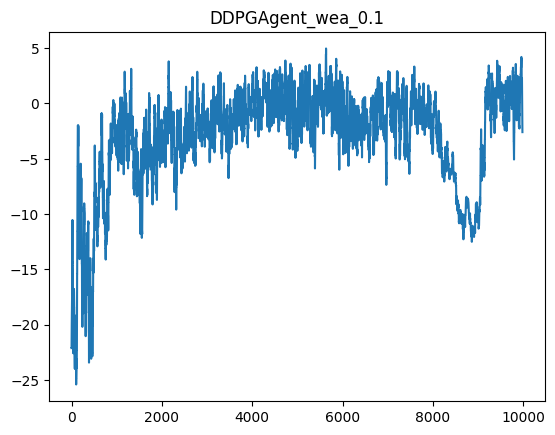

In [11]:
test = False
render = False
episodes=10000
mode = "normal"
eps = 0.1
update_target_every=100
update_policy_every=20
hidden_sizes_actor = [128,128]
hidden_sizes_critic = [128,128,64]
iter_fit = 32
std  = 0.0005
c = std/2


env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_DEFENSE)
agent = TD3.TD3Agent(env.observation_space, env.action_space, discount=1, eps=eps, 
                     update_target_every=update_target_every, update_policy_every=update_policy_every, 
                     hidden_sizes_actor=hidden_sizes_actor,hidden_sizes_critic=hidden_sizes_critic,
                     smoothing_std=std, smoothing_clip=c)
checkpoint = None
if test:
    checkpoint = f'./results/{type(agent).__name__}_hockey_{episodes}-eps{eps}-{mode}.pth'
    episodes=1000
    mode='normal'
env.close()
if checkpoint is not None:
    agent.restore_state(torch.load(checkpoint))
    
#mode = "normal"
losses_wea, rewards_wea = train(agent, mode=mode, episodes=episodes, eps=eps, test=test, iter_fit=iter_fit, render=render)
rewards_wea_avg = moving_average(rewards_wea, 20)
plt.plot(rewards_wea_avg)
plt.title(f'{type(agent).__name__}_wea_{eps}')
plt.show()


mode='normal'
episodes=10000
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_DEFENSE)
agent = DDPG.DDPGAgent(env.observation_space, env.action_space, 
                       discount=1, eps=eps, update_target_every=update_target_every, hidden_sizes_actor=hidden_sizes_actor,hidden_sizes_critic=hidden_sizes_critic)
checkpoint = None
if test:
    checkpoint = f'./results/{type(agent).__name__}_hockey_{episodes}-eps{eps}-{mode}.pth'
    episodes=1000
    mode='normal'
env.close()
if checkpoint is not None:
    agent.restore_state(torch.load(checkpoint))
losses_wea, rewards_wea = train(agent, mode=mode, episodes=episodes, eps=eps, test=test, iter_fit=iter_fit, render=render)
rewards_wea_avg = moving_average(rewards_wea, 20)
plt.plot(rewards_wea_avg)
plt.title(f'{type(agent).__name__}_wea_{eps}')
plt.show()


In [ ]:
A = torch.randn(5)
b = torch.clamp(A, 0.2,0.5)
print(b)

In [ ]:
episodes = 1000
eps = 0
checkpoint = f'./results/DDPG_hockey_{episodes}-eps{eps}-weak.pth'
agent = DDPG.DDPGAgent(env.observation_space, env.action_space, discount=1, eps=eps)
agent.restore_state(torch.load(checkpoint))
losses_wea,  rewards_wea = train(agent, mode="weak", episodes=1000, eps=0)

In [ ]:
rewards_weak_avg = moving_average(rewards_wea, 20)

plt.plot(rewards_weak_avg)

In [ ]:


rewards_att_avg = moving_average(rewards_att, 20)
plt.plot(rewards_def_avg.)
plt.title(f'def_{eps}')
plt.show()
plt.plot(rewards_att_avg)
plt.title(f'att_{eps}')
plt.show()

In [ ]:
rewards_def_avg = moving_average(rewards_def, 20)

In [ ]:

plt.plot(rewards_def_avg)
plt.title(f'schwanzus{eps}')